<a href="https://colab.research.google.com/github/rushikeshnaik779/shiptheorder/blob/main/Ecommmerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prachi13/customer-analytics

  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 43.3MB/s]


In [ ]:
!unzip customer-analytics.zip

Archive:  customer-analytics.zip
  inflating: Train.csv               


In [ ]:
# importing the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('../content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## let's become one with data 


In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe(include="all")

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [ ]:
# let's see the unique values present in the dataset 
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [ ]:
# checking for null values 
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Deleting the ID column because it doesn't make any sense in model building 

In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
# let's divide the cat columns and numerical columns 
cat_col = df.select_dtypes('object').columns
numeric_col = df.select_dtypes('int').columns 
print(f"Cat columns are :\n{cat_col}")
print(f"\nNumeric Columns are:\n{numeric_col}")

Cat columns are :
Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

Numeric Columns are:
Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [ ]:
# verifing
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


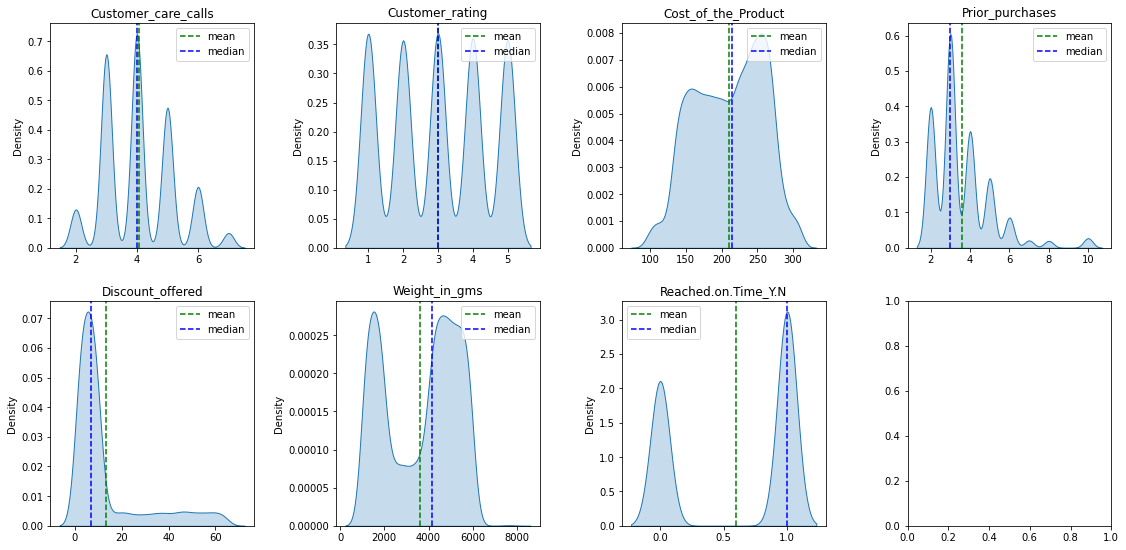

In [ ]:
in_df = df[numeric_col]
fig, ax = plt.subplots(2,4, figsize=(16, 8))
ax = ax.flatten()
for i in range(7):
    mean = in_df.iloc[:,i].mean()
    median = np.median(in_df.iloc[:,i])
    sns.kdeplot(in_df.iloc[:,i].values, ax=ax[i], shade=True)
    ax[i].axvline(mean, color='g', linestyle='--', label='mean')
    ax[i].axvline(median, color='b', linestyle='--', label='median')
    ax[i].set_title(in_df.columns[i])
    ax[i].legend()
fig.tight_layout(pad=2.0)

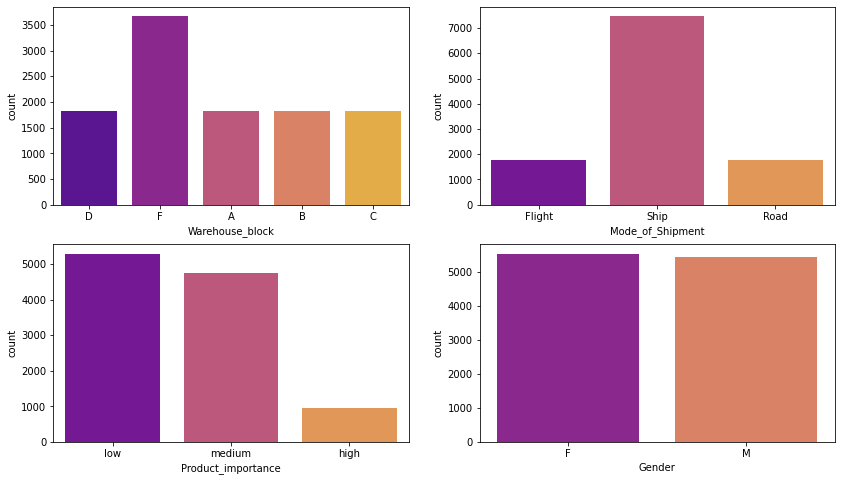

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax = ax.flatten()
for i in range(4):
    sns.countplot(ax=ax[i], data=df, x=cat_col[i], palette='plasma')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


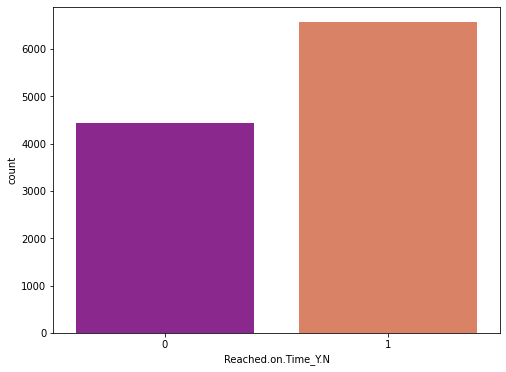

In [ ]:
# reachontime 
plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(df['Reached.on.Time_Y.N'], palette="plasma")
plt.show()

## Modeling for finding the Reached.on.TIme.yN

In [ ]:
# preprocessing the data 
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0


In [ ]:
# print 
print(f'Shape of the dummy df {df_dummy.shape}')

Shape of the dummy df (10999, 16)


In [ ]:
# importing libraries which gonna help in model building and modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X, y = df_dummy.drop('Reached.on.Time_Y.N', axis=1), df_dummy['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
print(f'Shape of the data {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}')

Shape of the data (8799, 15), (2200, 15), (8799,), (2200,)


In [ ]:
# Logistic Regression 

## creating an instance of Logistic Regression 
logreg = LogisticRegression()

## fitting a model to variables 
logreg.fit(X_train, y_train)
print(logreg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# predicting 
y_pred = logreg.predict(X_test)


In [ ]:
def metrix(y_true, y_pred):
    print('Confusion matrix\n', confusion_matrix(y_true, y_pred))
    print('\n\nClassificaiton Report\n', classification_report(y_true, y_pred))

In [ ]:
metrix(y_test, y_pred)

Confusion matrix
 [[487 400]
 [443 870]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.52      0.55      0.54       887
           1       0.69      0.66      0.67      1313

    accuracy                           0.62      2200
   macro avg       0.60      0.61      0.60      2200
weighted avg       0.62      0.62      0.62      2200



## ROC Curve 

In [ ]:
# Here we have given you a function to plot ROC curve. Please understand the function.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

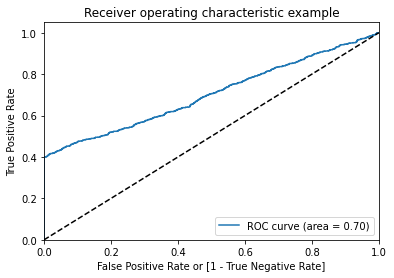

In [ ]:
probs = logreg.predict_proba(X_test)
fpr, tpr, thresholds = draw_roc(y_test, probs[:, 1])

## Decision Tree classifier 

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
metrix(y_test, y_pred_dtc)


Confusion matrix
 [[514 373]
 [411 902]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       887
           1       0.71      0.69      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200



### RandomForestTree

In [ ]:
# creating instance of the RandomForestTree as rft 
rft = RandomForestClassifier()
rft.fit(X_train, y_train)
y_pred_rft = rft.predict(X_test)
metrix(y_test, y_pred_rft)

Confusion matrix
 [[616 271]
 [485 828]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       887
           1       0.75      0.63      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.65      2200
weighted avg       0.68      0.66      0.66      2200



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

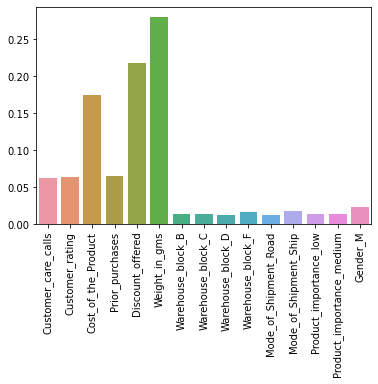

In [ ]:
sns.barplot(x=X_train.columns, y=rft.feature_importances_)
plt.xticks(rotation=90)

In [ ]:
from sklearn.feature_selection import RFE
rft = RandomForestClassifier()

 # Initialise RFE 
rfe = RFE(estimator= rft, n_features_to_select=6, step=1)       

# fitting RFE 
rfe = rfe.fit(X, y)

# Printing the boolean results
print(rfe.support_)     
# Printing the ranking
print(rfe.ranking_) 

[ True  True  True  True  True  True False False False False False False
 False False False]
[ 1  1  1  1  1  1 10  6  7  5  9  4  3  8  2]


In [ ]:
new_col = X_train.columns[rfe.support_]
print(new_col)

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [ ]:
rft = RandomForestClassifier()
rft.fit(X_train[new_col], y_train)
y_pred = rft.predict(X_test[new_col])

In [ ]:
metrix(y_test, y_pred)

Confusion matrix
 [[614 273]
 [475 838]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       887
           1       0.75      0.64      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200



In [ ]:
# Grid search cv 

#params = {
#    'max_depth' : [4,5,10,20,None],
#    'min_samples_split' : [2,3,4,5],
#    'max_leaf_nodes' : [2,5,10,None]
#}
#gv = GridSearchCV(estimator=RandomForestClassifier(), 
#                  param_grid = params, 
#                  return_train_score=True, 
#                  verbose=1)

In [ ]:
#gv.fit(X_train[new_col], y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
#gv.best_score_

0.6882619256809137

In [ ]:
#gv.best_params_

{'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_split': 2}

In [ ]:
rf = RandomForestClassifier(max_depth=5, max_leaf_nodes=None, min_samples_split=2,n_estimators=200)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
metrix(y_test, y_pred)

Confusion matrix
 [[708 179]
 [556 757]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.56      0.80      0.66       887
           1       0.81      0.58      0.67      1313

    accuracy                           0.67      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200



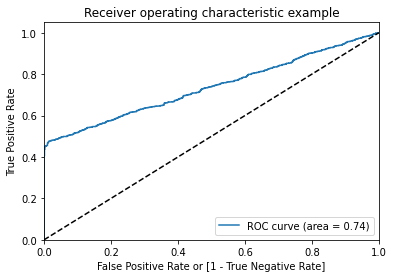

In [ ]:
probs = rf.predict_proba(X_test)
fpr, tpr, thresholds = draw_roc(y_test, probs[:, 1])

In [ ]:
## Analysizing the threshold 
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test.index
y_test_df.reset_index(drop=True, inplace=True)
#y_pred.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, pd.Series(probs[:, 1])], axis=1)
y_pred_final

,Reached.on.Time_Y.N,id,0
0,1,3732,0.454268
1,1,1245,0.947378
2,1,535,0.892503
3,1,4700,0.460128
4,1,3459,0.466586
...,...,...,...
2195,1,1677,0.956252
2196,1,7767,0.506180
2197,1,9307,0.485428
2198,1,1734,0.957275


In [ ]:
y_pred_final.columns = ["Reach?", "id", "pred"]

In [ ]:
y_pred_final.head()

,Reach?,id,pred
0,1,3732,0.454268
1,1,1245,0.947378
2,1,535,0.892503
3,1,4700,0.460128
4,1,3459,0.466586


In [ ]:
y_pred_final = y_pred_final.reindex([i for i in range(0, len(y_pred_final))])

In [ ]:
y_pred_final.head()

,Reach?,id,pred
0,1,3732,0.454268
1,1,1245,0.947378
2,1,535,0.892503
3,1,4700,0.460128
4,1,3459,0.466586


In [ ]:
y_pred_final['predicted_1'] = y_pred_final['pred']>0.5
y_pred_final['predicted_1'] = y_pred_final['predicted_1'].map({True:1, False:0})

In [ ]:
y_pred_final.head()

,Reach?,id,pred,predicted_1
0,1,3732,0.454268,0
1,1,1245,0.947378,1
2,1,535,0.892503,1
3,1,4700,0.460128,0
4,1,3459,0.466586,0


In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final['pred']>i
    y_pred_final[i] = y_pred_final[i].map({True:1, False:0})

    
# print  y_pred_final head
y_pred_final.head()

,Reach?,id,pred,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,3732,0.454268,0,1,1,1,1,1,0,0,0,0,0
1,1,1245,0.947378,1,1,1,1,1,1,1,1,1,1,1
2,1,535,0.892503,1,1,1,1,1,1,1,1,1,1,0
3,1,4700,0.460128,0,1,1,1,1,1,0,0,0,0,0
4,1,3459,0.466586,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = confusion_matrix(y_pred_final['predicted_1'], y_pred_final[i])
    tn, fp, fn, tp = cm1.ravel()
    #total in cm1
    total1= cm1
    
    #Calculate accuracy
    accuracy = accuracy_score(y_pred_final['predicted_1'], y_pred_final[i]) 
    
    #calculate specificity
    speci = tn/(tn+fp)
    
    #calculate sensitivity
    sensi = tp/(tp+fn)
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i, 'prob'] = i 
    cutoff_df.loc[i, 'accuracy'] = accuracy
    cutoff_df.loc[i, 'sensi'] = sensi
    cutoff_df.loc[i, 'speci'] = speci 

cutoff_df['prob']=pd.to_numeric(cutoff_df['prob'])
cutoff_df['accuracy']=pd.to_numeric(cutoff_df['accuracy'])
cutoff_df['sensi']=pd.to_numeric(cutoff_df['sensi'])
cutoff_df['speci']=pd.to_numeric(cutoff_df['speci'])


# print cutoff_df 
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.425455,1.000000,0.0
0.1,0.1,0.425455,1.000000,0.0
0.2,0.2,0.425455,1.000000,0.0
0.3,0.3,0.425455,1.000000,0.0
0.4,0.4,0.425455,1.000000,0.0
0.5,0.5,1.000000,1.000000,1.0
0.6,0.6,0.866364,0.685897,1.0
0.7,0.7,0.843636,0.632479,1.0
0.8,0.8,0.811818,0.557692,1.0
0.9,0.9,0.796818,0.522436,1.0


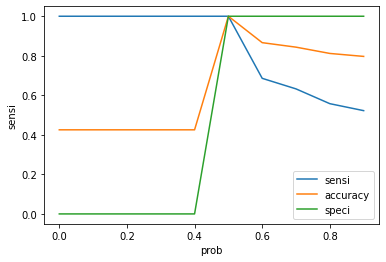

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.lineplot(data=cutoff_df, x="prob", y="sensi")
sns.lineplot(data=cutoff_df, x="prob", y="accuracy")
sns.lineplot(data=cutoff_df, x="prob", y="speci")
plt.legend(['sensi', 'accuracy', 'speci'])
plt.show()

In [ ]:
metrix(y_test, y_pred_final[0.7])

Confusion matrix
 [[885   2]
 [723 590]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       887
           1       1.00      0.45      0.62      1313

    accuracy                           0.67      2200
   macro avg       0.77      0.72      0.66      2200
weighted avg       0.82      0.67      0.66      2200



In [ ]:
metrix(y_test, y_pred_final[0.5])

Confusion matrix
 [[708 179]
 [556 757]]


Classificaiton Report
               precision    recall  f1-score   support

           0       0.56      0.80      0.66       887
           1       0.81      0.58      0.67      1313

    accuracy                           0.67      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200

